In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
#from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from kneed import KneeLocator, DataGenerator
import random



In [3]:
floorplan = mpimg.imread('floorplan.png')
#plt.figure(figsize = (20,10))
#plt.imshow(floorplan)
h, w, c = floorplan.shape
print(w,h)

892 583


In [4]:
point, pointLabel = [], []
for n in range(40):
    point.append([random.randint(0, w), random.randint(0, h)])
    pointLabel.append('1.' + str(n+1))




# point.append([100, 400])
# pointLabel.append('1.5')
# point.append([100, 500])
# pointLabel.append('1.6')
# point.append([100, 550])
# pointLabel.append('1.7')
# point.append([100, 540])
# pointLabel.append('1.8')

# point.append([500, 540])
# pointLabel.append('1.9')
# point.append([500, 550])
# pointLabel.append('2.0')
point

[[230, 101],
 [558, 103],
 [683, 156],
 [17, 173],
 [280, 102],
 [882, 69],
 [211, 445],
 [729, 446],
 [664, 141],
 [796, 205],
 [334, 311],
 [790, 10],
 [423, 105],
 [741, 440],
 [548, 17],
 [627, 151],
 [892, 300],
 [205, 441],
 [313, 234],
 [617, 204],
 [836, 32],
 [489, 497],
 [305, 84],
 [296, 178],
 [183, 175],
 [179, 169],
 [855, 214],
 [358, 483],
 [796, 208],
 [666, 456],
 [527, 254],
 [531, 317],
 [851, 449],
 [630, 477],
 [885, 197],
 [534, 561],
 [603, 350],
 [158, 95],
 [724, 53],
 [281, 553]]

In [5]:
pointList = pd.DataFrame(point, columns=['x','y'])
pointList['label'] = pointLabel
point

[[230, 101],
 [558, 103],
 [683, 156],
 [17, 173],
 [280, 102],
 [882, 69],
 [211, 445],
 [729, 446],
 [664, 141],
 [796, 205],
 [334, 311],
 [790, 10],
 [423, 105],
 [741, 440],
 [548, 17],
 [627, 151],
 [892, 300],
 [205, 441],
 [313, 234],
 [617, 204],
 [836, 32],
 [489, 497],
 [305, 84],
 [296, 178],
 [183, 175],
 [179, 169],
 [855, 214],
 [358, 483],
 [796, 208],
 [666, 456],
 [527, 254],
 [531, 317],
 [851, 449],
 [630, 477],
 [885, 197],
 [534, 561],
 [603, 350],
 [158, 95],
 [724, 53],
 [281, 553]]

In [6]:




dbs = DBSCAN(eps = 35, min_samples=1, metric='euclidean')
dbs_c = dbs.fit_predict(point)
pointList['dbscan'] = dbs_c

pointList = pointList.sort_values(by=['dbscan', 'label'])
newpoint = []
for i in range(max(dbs_c)+1):
    newpoint=pointList.where(pointList.dbscan==8)
    
pointList['label'] = pointList[['x','y','label','dbscan']].groupby(['dbscan'])['label'].transform(lambda x: ', '.join(x))
#df[['name','text','month']].drop_duplicates()

pointList



,x,y,label,dbscan
0,230,101,1.1,0
1,558,103,1.2,1
2,683,156,"1.3, 1.9",2
8,664,141,"1.3, 1.9",2
3,17,173,1.4,3
22,305,84,"1.23, 1.5",4
4,280,102,"1.23, 1.5",4
5,882,69,1.6,5
17,205,441,"1.18, 1.7",6
6,211,445,"1.18, 1.7",6


In [7]:

colorList = []
for i in range(max(dbs_c)+1):
    r = random.randint(0, 255)
    b = random.randint(0, 255)
    g = random.randint(0, 255)
    color = (r, g, b)
    colorList.append('#' + ''.join('{:02X}'.format(i) for i in color))

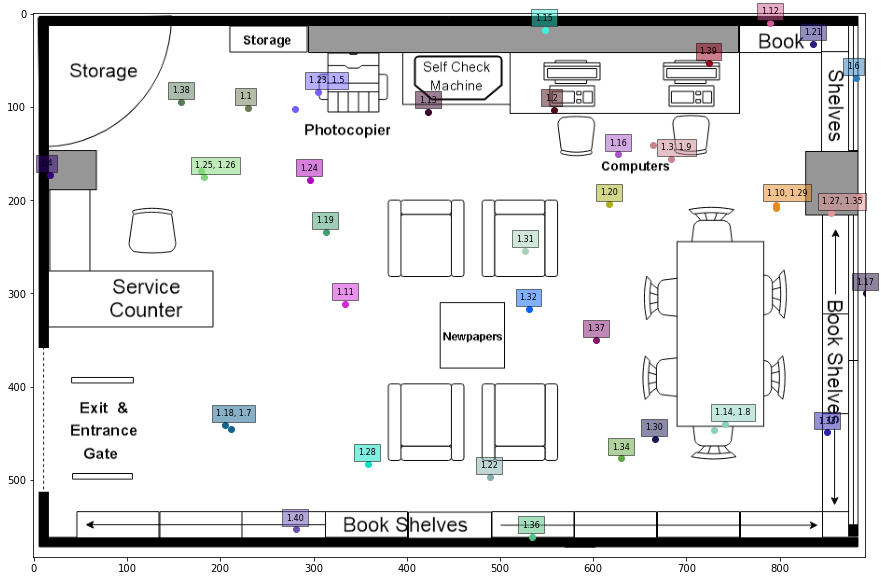

In [12]:

plt.figure(figsize = (20,10))
dbscan_clu = -1

for i in range(len(pointList)):
    plt.plot(pointList.iloc[i].x, pointList.iloc[i].y, 'o', color = colorList[pointList.iloc[i].dbscan])
    dbscan_clu = pointList.iloc[i].dbscan
    if(dbscan_clu != pointList.iloc[i-1].dbscan):
        plt.text(pointList.iloc[i].x-10, pointList.iloc[i].y-10, str(pointList.iloc[i].label),fontsize=8, bbox={'facecolor': colorList[pointList.iloc[i].dbscan], 'alpha': 0.5, 'pad': 4})
        
        
    
    

plt.imshow(floorplan)

In [9]:
# def doKmeans(point):
#     slope_x, slope_y, slope = [], [], []

#     for i in range(1, len(point)):
#         kmeans = KMeans(n_clusters=i)
#         kmeans.fit(point)
#         slope_y.append(kmeans.inertia_)
#         slope_x.append(i)
#     #plt.plot(slope_x, slope_y)
#     #plt.title('Elbow Method')
#     #plt.xlabel('Number of clusters')
#     #plt.show()


#     k = KneeLocator(slope_x, slope_y, curve='convex', direction='decreasing').knee
#     print('K is ',k) 
#     colorList = []
#     for i in range(k):
#         r = random.randint(0, 255)
#         b = random.randint(0, 255)
#         g = random.randint(0, 255)
#         color = (r, g, b)
        
        
#         colorList.append('#' + ''.join('{:02X}'.format(i) for i in color))
#     print(colorList)
#     km =  KMeans(n_clusters = k)
#     km.fit(point)
#     pointList['kmeans'] = km.labels_
#     print(pointList)
#     #draw = ImageDraw.Draw(floorplan)
#     #font = ImageFont.truetype('arial.ttf', 12)
    
#     for i in range(len(pointList)):
#         plt.text(pointList.iloc[i].x, pointList.iloc[i].y-20, str(pointList.iloc[i].label),fontsize=12, bbox={'facecolor': colorList[pointList.iloc[i].kmeans], 'alpha': 0.5, 'pad': 10})
#         plt.plot(pointList.iloc[i].x, pointList.iloc[i].y, 'o', color = 'r')
#         #draw.text([pointList.iloc[i].x, pointList.iloc[i].y],'*',font=font, fill=colorList[pointList.iloc[i].kmeans])
#         #draw.text([pointList.iloc[i].x+10, pointList.iloc[i].y+10], str(pointList.iloc[i].label), font=font, fill=colorList[pointList.iloc[i].kmeans])
    


# #plt.figure(figsize = (20,10))
# #plt.imshow(floorplan)
# #doKmeans(point)